In [16]:
import random
import numpy as np
import pandas as pd

in_dist = {8000: 0.45, 11000: 0.55}
out_dist = {6000: 0.05, 7000: 0.15, 8000: 0.20, 9000: 0.30, 10000: 0.2, 11000: 0.1}

in_acum = None
out_acum = None

max_inv = 25000

def get_acum(dist):

    acum = {}
    curr = 0

    for key in dist:
        acum[key] = dist[key] + curr
        curr = acum[key]

    return acum

def match_dist(x, dist):

    for key in dist:
        if x < dist[key]:
            return key
        
    return dist.keys()[-1]

def get_state(qi, rand_dist = None):

    if rand_dist is not None:
        rand_a = rand_dist[0]
        rand_b = rand_dist[1]
    else:
        rand_a = random.random()
        rand_b = random.random()

    ins = match_dist(rand_a, in_acum)
    out = match_dist(rand_b, out_acum)

    inv = qi + ins
    surplus = max(0, inv - max_inv)

    inv = min(max_inv, inv)

    qf = inv - out
    
    #qf = max(0, qf)

    return [qi, rand_a, ins, inv, rand_b, out, qf, surplus]

in_acum = get_acum(in_dist)
out_acum = get_acum(out_dist)

print(in_acum)
print(out_acum)

{8000: 0.45, 11000: 1.0}
{6000: 0.05, 7000: 0.2, 8000: 0.4, 9000: 0.7, 10000: 0.8999999999999999, 11000: 0.9999999999999999}


In [17]:
curr = 0
sim = []

#n = 100
n = int(input('Days: '))

for i in range(n):
    line = get_state(curr)
    sim.append(line)
    curr = line[6]

df = pd.DataFrame(sim, 
                  columns = ['q0' , 'rand_a', 'ins', 'inv', 'rand_b', 'outs' , 'qf', 'surplus']) 

print(df)

print()

print('Mean (d0): ', np.mean(df['q0']))
print('Mean (ins): ', np.mean(df['ins']))
print('Mean (outs): ', np.mean(df['outs']))
print('Mean (df): ', np.mean(df['qf']))

print()

print('Total steel bought: ', np.sum(df['ins']))
print('Total steel used: ', np.sum(df['outs']))

print()

print('Mean (surplus): ', np.mean(df['surplus']))
print('Max (surplus): ', np.max(df['surplus']))
print('Total (surplus): ', np.sum(df['surplus']))

print()

print('Mean (rand_a): ', np.mean(df['rand_a']))
print('Mean (rand_b): ', np.mean(df['rand_b']))


           q0    rand_a    ins    inv    rand_b   outs     qf  surplus
0           0  0.494227  11000  11000  0.957272  11000      0        0
1           0  0.969646  11000  11000  0.948301  11000      0        0
2           0  0.955786  11000  11000  0.313415   8000   3000        0
3        3000  0.439505   8000  11000  0.046764   6000   5000        0
4        5000  0.279181   8000  13000  0.564242   9000   4000        0
...       ...       ...    ...    ...       ...    ...    ...      ...
999995  11000  0.271600   8000  19000  0.140866   7000  12000        0
999996  12000  0.162653   8000  20000  0.398010   8000  12000        0
999997  12000  0.463753  11000  23000  0.250723   8000  15000        0
999998  15000  0.655049  11000  25000  0.271836   8000  17000     1000
999999  17000  0.353151   8000  25000  0.857338  10000  15000        0

[1000000 rows x 8 columns]

Mean (d0):  14961.469
Mean (ins):  9650.237
Mean (outs):  8749.218
Mean (df):  14961.484

Total steel bought:  96502370

Trend steel stored: y = 4.728998148005319e-05x + 14937.839032904967


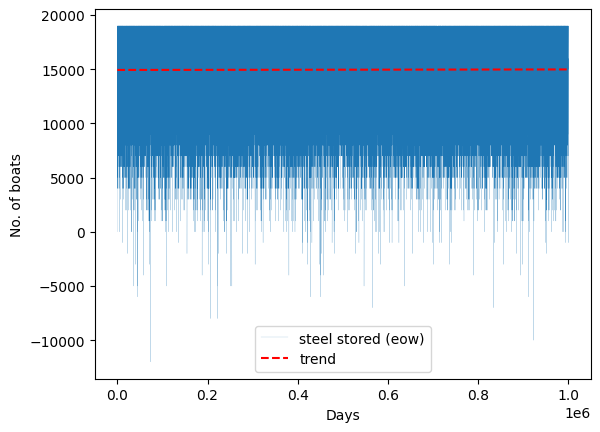

In [18]:
import matplotlib.pyplot as plt

x = range(len(df))
y = df['qf']

plt.plot(x, y, label='steel stored (eow)', linewidth=0.1)

plt.ylabel('No. of boats')
plt.xlabel('Days')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r--", label=f'trend')

print(f'Trend steel stored: y = {z[0]}x + {z[1]}')

plt.legend()

plt.show()  

In [19]:
curr = 0
sim = []
rand_dist = [.34, .45,
             .84, .16,
             .29, .88,
             .04, .93,
             .39, .02,
             .85, .65,
             .27, .38,
             .82, .11,
             .40, .02,
             .51, .67,
             .79, .16,
             .83, .32,
             .64, .89,
             .50, .60,
             .78, .43,
             .83, .19,
             .04, .51,
             .28, .80,
             .66, .92,
             .42, .69]

#n = 100

for i in range(len(rand_dist)//2):
    line = get_state(curr, rand_dist[i*2:i*2+2])
    sim.append(line)
    curr = line[6]

df = pd.DataFrame(sim, 
                  columns = ['q0' , 'rand_a', 'ins', 'inv', 'rand_b', 'outs' , 'qf', 'surplus']) 

print(df)

print()

print('Mean (d0): ', np.mean(df['q0']))
print('Mean (ins): ', np.mean(df['ins']))
print('Mean (outs): ', np.mean(df['outs']))
print('Mean (df): ', np.mean(df['qf']))

print()

print('Mean (rand_a): ', np.mean(df['rand_a']))
print('Mean (rand_b): ', np.mean(df['rand_b']))

       q0  rand_a    ins    inv  rand_b   outs     qf  surplus
0       0    0.34   8000   8000    0.45   9000  -1000        0
1   -1000    0.84  11000  10000    0.16   7000   3000        0
2    3000    0.29   8000  11000    0.88  10000   1000        0
3    1000    0.04   8000   9000    0.93  11000  -2000        0
4   -2000    0.39   8000   6000    0.02   6000      0        0
5       0    0.85  11000  11000    0.65   9000   2000        0
6    2000    0.27   8000  10000    0.38   8000   2000        0
7    2000    0.82  11000  13000    0.11   7000   6000        0
8    6000    0.40   8000  14000    0.02   6000   8000        0
9    8000    0.51  11000  19000    0.67   9000  10000        0
10  10000    0.79  11000  21000    0.16   7000  14000        0
11  14000    0.83  11000  25000    0.32   8000  17000        0
12  17000    0.64  11000  25000    0.89  10000  15000     3000
13  15000    0.50  11000  25000    0.60   9000  16000     1000
14  16000    0.78  11000  25000    0.43   9000  16000  

Trend steel stored: y = 1037.593984962406x + -757.1428571428544


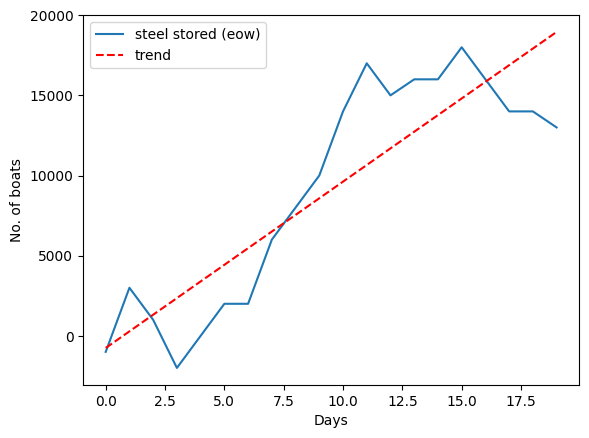

In [20]:
import matplotlib.pyplot as plt

x = range(len(df))
y = df['qf']

plt.plot(x, y, label='steel stored (eow)')

plt.ylabel('No. of boats')
plt.xlabel('Days')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r--", label=f'trend')

print(f'Trend steel stored: y = {z[0]}x + {z[1]}')

plt.legend()

plt.show()  